In [3]:
import urllib
from bs4 import BeautifulSoup
import requests
import pandas as pd
import requests
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn import datasets
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegressionCV

In [4]:
# compare
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
import numpy as np

In [19]:
#baseball4['FIP'] = ((((13*baseball4.HR)+(3*baseball4.BB)-(2*baseball4.K))/baseball4.IP)+3.2)

In [20]:
'''
for x,y in zip( baseball4['IP'].values,baseball4['ER'].values):
    if x >= 6.0:
        if y <= 3.0:
            QS.append(1)
        else:
            QS.append(0)
    else:
        QS.append(0)'''


"\nfor x,y in zip( baseball4['IP'].values,baseball4['ER'].values):\n    if x >= 6.0:\n        if y <= 3.0:\n            QS.append(1)\n        else:\n            QS.append(0)\n    else:\n        QS.append(0)"

In [6]:
baseball5 = pd.read_csv("baseball5")
baseball5.head()

,Unnamed: 0,Name,IP,H,R,ER,BB,K,HR,ERA,...,StS,StL,GB,FB,LD,GB_rate,FB_rate,LD_rate,QS,FIP
0,0,Wade Miley,5.0,3,3,3,2,8,1,5.40,...,11.0,15.0,6.0,7.0,3.0,0.375000,0.437500,0.187500,0,3.800000
1,1,Trevor Cahill,4.0,8,5,5,4,1,0,11.25,...,3.0,10.0,8.0,9.0,6.0,0.347826,0.391304,0.260870,0,5.700000
2,2,Brandon McCarthy,6.2,6,5,5,1,4,1,6.75,...,7.0,20.0,11.0,11.0,5.0,0.407407,0.407407,0.185185,0,4.490323
3,3,Wade Miley,7.0,6,4,4,1,5,1,5.25,...,12.0,18.0,11.0,11.0,5.0,0.407407,0.407407,0.185185,0,4.057143
4,4,Trevor Cahill,6.0,4,2,2,3,3,0,6.30,...,7.0,16.0,9.0,10.0,5.0,0.375000,0.416667,0.208333,1,3.700000


In [7]:
baseball5=baseball5.drop("Unnamed: 0",axis=1)
baseball5.head()

,Name,IP,H,R,ER,BB,K,HR,ERA,BF,...,StS,StL,GB,FB,LD,GB_rate,FB_rate,LD_rate,QS,FIP
0,Wade Miley,5.0,3,3,3,2,8,1,5.40,22,...,11.0,15.0,6.0,7.0,3.0,0.375000,0.437500,0.187500,0,3.800000
1,Trevor Cahill,4.0,8,5,5,4,1,0,11.25,23,...,3.0,10.0,8.0,9.0,6.0,0.347826,0.391304,0.260870,0,5.700000
2,Brandon McCarthy,6.2,6,5,5,1,4,1,6.75,27,...,7.0,20.0,11.0,11.0,5.0,0.407407,0.407407,0.185185,0,4.490323
3,Wade Miley,7.0,6,4,4,1,5,1,5.25,28,...,12.0,18.0,11.0,11.0,5.0,0.407407,0.407407,0.185185,0,4.057143
4,Trevor Cahill,6.0,4,2,2,3,3,0,6.30,25,...,7.0,16.0,9.0,10.0,5.0,0.375000,0.416667,0.208333,1,3.700000


In [5]:
easy_baseball3= pd.read_csv('easy_baseball2.csv')
easy_baseball3.head()

,Unnamed: 0,Name,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,Str,Ctct,StS,StL,GB,FB,LD,QS
0,0,Dustin McGowan,2.2,8,4,4,1,3,0,13.50,17,72,45,29,4,12,5,8,5,0
1,1,R.A. Dickey,6.2,5,0,0,1,6,0,4.63,25,108,69,41,12,16,9,8,3,1
2,2,Drew Hutchison,3.1,6,6,6,3,6,1,6.23,20,78,49,22,13,14,4,6,2,0
3,3,Mark Buehrle,5.1,8,1,1,1,3,0,0.64,24,81,50,30,8,12,9,11,8,0
4,4,Brandon Morrow,6.0,5,3,3,1,9,1,5.73,24,86,60,25,19,16,8,6,3,1


In [8]:
easy_baseball3=easy_baseball3.drop("Unnamed: 0",axis=1)
easy_baseball3.head()

,Name,IP,H,R,ER,BB,K,HR,ERA,BF,Pit,Str,Ctct,StS,StL,GB,FB,LD,QS
0,Dustin McGowan,2.2,8,4,4,1,3,0,13.50,17,72,45,29,4,12,5,8,5,0
1,R.A. Dickey,6.2,5,0,0,1,6,0,4.63,25,108,69,41,12,16,9,8,3,1
2,Drew Hutchison,3.1,6,6,6,3,6,1,6.23,20,78,49,22,13,14,4,6,2,0
3,Mark Buehrle,5.1,8,1,1,1,3,0,0.64,24,81,50,30,8,12,9,11,8,0
4,Brandon Morrow,6.0,5,3,3,1,9,1,5.73,24,86,60,25,19,16,8,6,3,1


In [44]:
baseball6 = baseball5.to_csv("baseball6")

In [47]:
easy_baseball4 = easy_baseball3.to_csv("easy_baseball3")

In [5]:
baseball6=pd.read_csv('baseball6')

In [6]:
easy_baseball4= pd.read_csv('easy_baseball3')

In [7]:
#X = baseball5[['IP', 'H','R','ER','BB','K','HR','ERA','BF','Pit','Str', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
#exclude IP and ER from X to limit blatant collinearity
#exclude Strikes due to Ctct, Sts, StL all components of Strikes, K's overlap and BIP are strikes good or bad outcome
X = baseball6[['BB','K', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
#X2 = baseball5[['HR', 'H', 'BB','K','Pit', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X2_scaled = scaler.fit_transform(X2)
#y1 = baseball5.FIP
y2= baseball6.QS
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.33, random_state=0)

In [8]:
############ logistic regression on pitching game data and Quality Starts
logreg = LogisticRegression()
logreg.fit(X_scaled, y2)
#scores = cross_validation.cross_val_score(logreg, X2, Y2, cv=5)
#scores.mean()

logreg.get_params

<bound method LogisticRegression.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [9]:
cross_val_score(logreg, X_scaled, y2, cv=5)

array([ 0.7375    ,  0.75312856,  0.72696246,  0.73265074,  0.74601367])

In [11]:
baseball6_scores = cross_val_score(logreg, X_scaled, y2, cv=5, scoring='roc_auc')
print np.mean(baseball6_scores)

0.820343432046


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.33, random_state=0)
logreg.coef_
logreg.intercept_
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

#not-scaled
#with IP, ER included, test size = 0.2, score: .914
#with IP, ER included, test size = 0.2, C=1000, penalty = 'l2', score: .927
#with IP, ER included, test size = 0.33, score: .918
#with IP, ER included, test size = 0.33, C=10, penalty = 'l1', score: .934

####Scaled Below
#with IP, ER included, test size = 0.2, score: .933
#with IP, ER included, test size = 0.2, C=1000, penalty = 'l2, score: .927
#with IP, ER included, test size = 0.33, score: .935
#with IP, ER included, test size = 0.33, C=10, penalty = 'l1, score: .936

#NOT-SCALED
#with IP, ER excluded, test size = 0.2, score: .900
#with IP, ER excluded, test size = 0.2, C=10, penalty = 'l2', score: .901
#with IP, ER excluded, test size = 0.33, score: .890
#with IP, ER excluded, test size = 0.33, C = 1, penalty = 'l1' score: .897

#SCALED
#with IP, ER excluded, test size = 0.2, score: .901
#with IP, ER excluded, test size = 0.2, C=1, penalty = 'l2', score: .901
#with IP, ER excluded, test size = 0.33, score: .8987
#with IP, ER excluded, test size = 0.33, C = 0.1, penalty = 'l2' score: .901

#NOT-SCALED
#with IP, ER, R, ERA, BF excluded, test size = 0.2, score: .869
#with IP, ER, R, ERA, BF  excluded, test size = 0.2, C=1000, penalty = 'l2', score: .875
#wwith IP, ER, R, ERA, BF  excluded, test size = 0.33, score: .864
#with IP, ER, R, ERA, BF excluded, test size = 0.33, C=1, penalty = 'l1', score: .867

#SCALED
#with IP, ER, R, ERA, BF excluded, test size = 0.2, score: .875
#with IP, ER, R, ERA, BF  excluded, test size = 0.2, C=100, penalty = 'l2', score: .875
#wwith IP, ER, R, ERA, BF  excluded, test size = 0.33, score: .865
#with IP, ER, R, ERA, BF excluded, test size = 0.33, C=10, penalty = 'l1', score: .866

#NOT-SCALED
#with IP, ER, R, H, BF, ERA, HR excluded, test size = 0.2, score: .753
#with IP, ER, R, H, BF, ERA, HR excluded, test size = 0.2, C=1, penalty = 'l2', score: .753
#with IP, ER, R, H, BF, ERA, HR excluded, test size = 0.33, score: .736
#with IP, ER, R, H, BF, ERA, HR excluded, test size = 0.33, C=1, penalty = 'l1', score: .736

#SCALED
#with IP, ER, R, H, BF, ERA, HR excluded, test size = 0.2, score: .752
#with IP, ER, R, H, BF, ERA, HR excluded, test size = 0.2, C=0.1, penalty = 'l2', score: .757
#with IP, ER, R, H, BF, ERA, HR excluded, test size = 0.33, score: .734
#with IP, ER, R, H, BF, ERA, HR excluded, test size = 0.33, C=0.1, penalty = 'l2', score: .737

#logreg scorewith IP, ER, Pit R, H,HR, BF, ERA, HR out, test size = 0.33, C=0.1, penalty = 'l2', score: .737

0.73259820813232257

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.33, random_state=0)

param_grid = [{'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}]
 
model = GridSearchCV(logreg, param_grid, cv=5)
model.fit(X_train, y_train)
y_true, y_pred = y_test, model.predict(X_test)
metrics.accuracy_score(y_true, y_pred)
print(metrics.classification_report(y_true, y_pred))

model.best_params_

             precision    recall  f1-score   support

          0       0.76      0.75      0.75       793
          1       0.70      0.71      0.71       658

avg / total       0.73      0.73      0.73      1451



{'C': 0.1, 'penalty': 'l2'}

In [14]:
from sklearn.metrics import confusion_matrix
confusion = np.array(confusion_matrix(y_test, y_pred))
print(confusion)

[[596 197]
 [191 467]]


In [15]:
# calculate true positives, the number of 1s correctly predicted to be 1
TP = confusion[0,0]
# calculate false positives, the number of 0s incorrectly predicted to be 1
FP  = confusion[1,0]
# calculate true negatives, the number of 0s correctly predicted to be 0
TN = confusion[1,1]
# calculate false negatives, the number of 1s incorrectly predicted to be 0
FN = confusion[0,1]

In [16]:
print TP
print FP
print TN
print FN

596
191
467
197


In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
%matplotlib inline

In [18]:
y_score = logreg.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

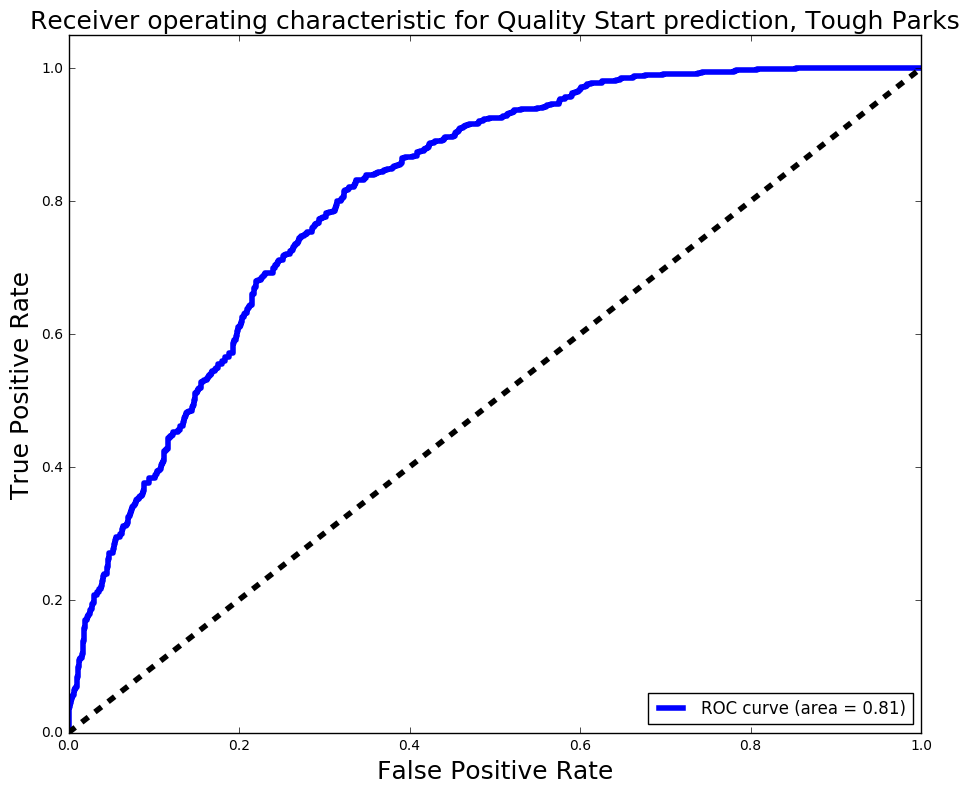

In [20]:
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Quality Start prediction, Tough Parks', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [21]:
#exclude IP and ER from X to limit blatant collinearity
#exclude Strikes due to Ctct, Sts, StL all components of Strikes, K's overlap and BIP are strikes good or bad outcome
#exclude 
X = easy_baseball4[['BB','K', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
X2 = easy_baseball4[['HR', 'H', 'BB','K','Pit', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X2_scaled = scaler.fit_transform(X2)
y2= easy_baseball4.QS
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.33, random_state=0)

In [22]:
####EASY BALLPARK LOGISTIC REGRESSION AND ROC/AUC/CONFUSION MATRIX/CLASSRPT
############ logistic regression on pitching game data and Quality Starts
logreg = LogisticRegression(C = 0.1, penalty = 'l1')
logreg.fit(X_scaled, y2)
#scores = cross_validation.cross_val_score(logreg, X2, Y2, cv=5)
#scores.mean()

logreg.get_params

<bound method LogisticRegression.get_params of LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [23]:
cross_val_score(logreg, X_scaled, y2, cv=5)

array([ 0.73706004,  0.72901554,  0.75544041,  0.72901554,  0.72746114])

In [25]:
easy_baseball4_scores = cross_val_score(logreg, X_scaled, y2, cv=5, scoring='roc_auc')
print np.mean(easy_baseball4_scores)

0.794116798582


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.33, random_state=0)
logreg.coef_
logreg.intercept_
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

#Easy Park Score, scaled, test size = 0.33, C = 0.1, penalty = 'l1'

0.73163841807909602

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.33, random_state=0)

param_grid = [{'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}]
 
model = GridSearchCV(logreg, param_grid, cv=5)
model.fit(X_train, y_train)
y_true, y_pred = y_test, model.predict(X_test)
metrics.accuracy_score(y_true, y_pred)
print(metrics.classification_report(y_true, y_pred))

model.best_params_

             precision    recall  f1-score   support

          0       0.73      0.69      0.71      1511
          1       0.73      0.77      0.75      1675

avg / total       0.73      0.73      0.73      3186



{'C': 0.1, 'penalty': 'l1'}

In [28]:
from sklearn.metrics import confusion_matrix
confusion = np.array(confusion_matrix(y_test, y_pred))
print(confusion)

[[1048  463]
 [ 392 1283]]


In [29]:
# calculate true positives, the number of 1s correctly predicted to be 1
TP = confusion[0,0]
# calculate false positives, the number of 0s incorrectly predicted to be 1
FP  = confusion[1,0]
# calculate true negatives, the number of 0s correctly predicted to be 0
TN = confusion[1,1]
# calculate false negatives, the number of 1s incorrectly predicted to be 0
FN = confusion[0,1]

In [30]:
print TP
print FP
print TN
print FN

1048
392
1283
463


In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
%matplotlib inline

In [32]:
y_score = logreg.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

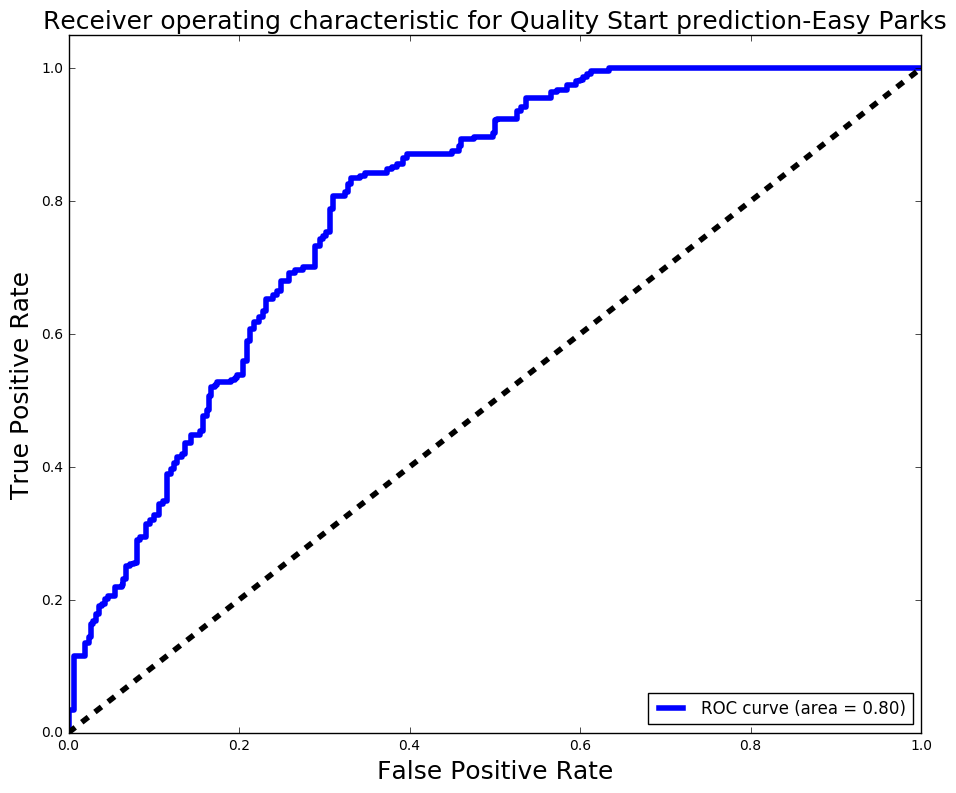

In [33]:
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Quality Start prediction-Easy Parks', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [65]:
X = easy_baseball4[['BB','K', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y2=easy_baseball4.QS
#Taken out IP, ER, BF, R, H, ERA, HR in that order due to overly predictive nature of features, or feature-engineering rooted nature 
#X = baseball5[['BB','K','Pit','Str', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
#from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

In [66]:
rt = tree.DecisionTreeClassifier()
rt.fit(X_scaled,y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

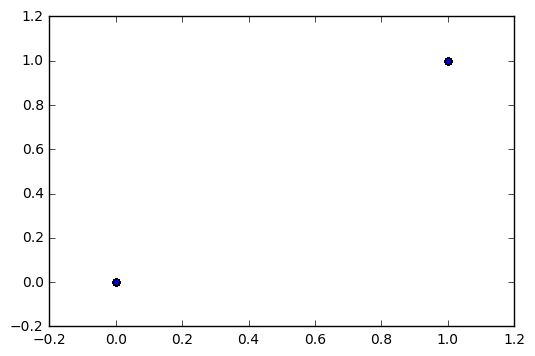

In [67]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, random_state=42, test_size=0.30)
y_pred = rt.predict(X_test)

plt.scatter(y_test, y_pred)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

In [69]:
from sklearn.cross_validation import cross_val_score

scores = []
best_score = 0
best_depth = 0

for i in range(1, 9):
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    current_score = cross_val_score(model, X, y2, cv=3, scoring='mean_squared_error')
    # remember sklearn does MSE in negative, so fix that
    current_score = -current_score
    # to get the error we want, we need the square root of the MSE
    current_score = np.sqrt(current_score)
    # then we will have an array, so we want the mean so we can get a real idea
    current_score = np.mean(current_score)
    
    # If the score mean is better than the current best, or best is the default, then update!
    if current_score < best_score or best_score == 0:
        best_score = current_score
        best_depth = i
        
    # store to plot anyway!
    scores.append(current_score)

Best score: 
0.41541799521
Best depth: 
8


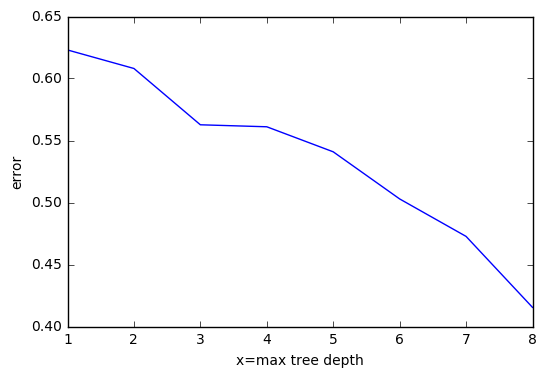

In [70]:
print 'Best score: ' 
print best_score
print "Best depth: " 
print best_depth

# now actually fit the model
model = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
model.fit(X, y2)

# plot our results
plt.figure()
plt.plot(range(1, 9), scores)
plt.xlabel('x=max tree depth')
plt.ylabel('error')

In [284]:
X = baseball5[['H','BB','K','HR','Pit', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Taken out IP, ER, BF, R, H, ERA, HR in that order due to overly predictive nature of features, or feature-engineering rooted nature 
#X = baseball5[['BB','K','Pit','Str', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

In [285]:
rt = tree.DecisionTreeRegressor(
 min_samples_split=30, min_samples_leaf=10,
  random_state=0)
rt.fit(X_scaled,y2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=30,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

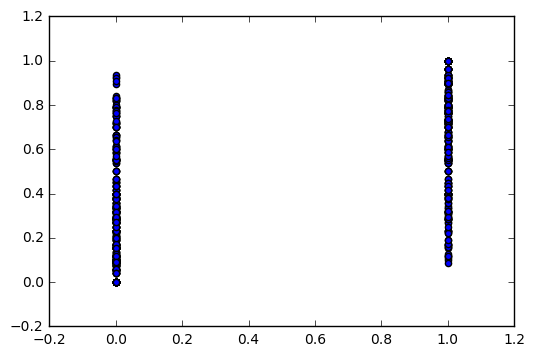

In [286]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, random_state=42, test_size=0.30)
y_pred = rt.predict(X_test)

plt.scatter(y_test, y_pred)

In [287]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6313020458868861

In [288]:
from sklearn.cross_validation import cross_val_score

scores = []
best_score = 0
best_depth = 0

for i in range(1, 9):
    model = DecisionTreeRegressor(max_depth=i, random_state=1)
    current_score = cross_val_score(model, X_scaled, y2, cv=3, scoring='mean_squared_error')
    # remember sklearn does MSE in negative, so fix that
    current_score = -current_score
    # to get the error we want, we need the square root of the MSE
    current_score = np.sqrt(current_score)
    # then we will have an array, so we want the mean so we can get a real idea
    current_score = np.mean(current_score)
    
    # If the score mean is better than the current best, or best is the default, then update!
    if current_score < best_score or best_score == 0:
        best_score = current_score
        best_depth = i
        
    # store to plot anyway!
    scores.append(current_score)

Best score: 
0.386164403675
Best depth: 
5


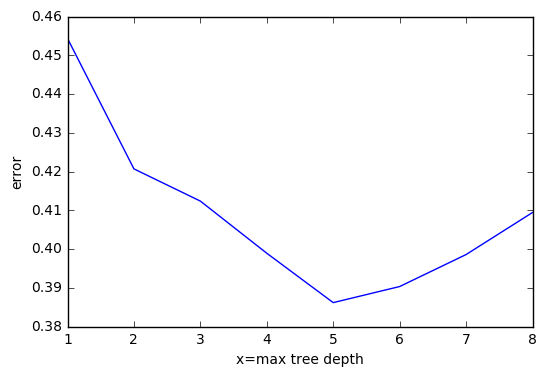

In [289]:
print 'Best score: ' 
print best_score
print "Best depth: " 
print best_depth

# now actually fit the model
model = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
model.fit(X_scaled, y2)

# plot our results
plt.figure()
plt.plot(range(1, 9), scores)
plt.xlabel('x=max tree depth')
plt.ylabel('error')

In [290]:
print scores

[0.45434152596499194, 0.42067482472108386, 0.41236378820872793, 0.39890800529742165, 0.38616440367498722, 0.39031224416500371, 0.39856666801161378, 0.40941628716628986]


In [294]:
pd.DataFrame({'feature':X.columns, 'importance':model.feature_importances_})

,feature,importance
0,H,0.380061
1,BB,0.021473
2,K,0.002261
3,HR,0.026063
4,Pit,0.003540
5,Str,0.453431
6,Ctct,0.000000
7,StS,0.000000
8,StL,0.006821
9,GB,0.086825
